# Imports

In [1]:
import importlib
import sys
import torch

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')

# Data

### Load Data Files

In [2]:
# Path to your pickle file (saved with torch.save)
file_path_train = '../../../../encoded_data/Helpdesk_proactive/helpdesk_all_lognormal_5_train.pkl'
# Load the dataset using torch.load
helpdesk_train_dataset = torch.load(file_path_train, weights_only=False)
# Check the type of the loaded dataset
print(type(helpdesk_train_dataset))

# Path to your pickle file (saved with torch.save)
file_path_val = '../../../../encoded_data/Helpdesk_proactive/helpdesk_all_lognormal_5_val.pkl'
# Load the dataset using torch.load
helpdesk_val_dataset = torch.load(file_path_val, weights_only=False)
# Check the type of the loaded dataset
print(type(helpdesk_val_dataset))

<class 'event_log_loader.new_event_log_loader.EventLogDataset'>
<class 'event_log_loader.new_event_log_loader.EventLogDataset'>


/home/PSPLab/.local/share/virtualenvs/probabilistic_suffix_prediction_dev-Otdb6r1k/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator OrdinalEncoder from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/PSPLab/.local/share/virtualenvs/probabilistic_suffix_prediction_dev-Otdb6r1k/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator SimpleImputer from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/PSPLab/.local/share/virtualenvs/probabilistic_suffix_prediction_d

### Train Data Insights

In [3]:
# Helpdesk Dataset Categories, Features:

helpdesk_all_categories = helpdesk_train_dataset.all_categories

helpdesk_all_categories_cat = helpdesk_all_categories[0]
print(helpdesk_all_categories_cat)

helpdesk_all_categories_num = helpdesk_all_categories[1]
print(helpdesk_all_categories_num)

for i, cat in enumerate(helpdesk_all_categories_cat):
     print(f"Helpdesk (5) Categorical feature: {cat[0]}, Index position in categorical data list: {i}")
     print(f"Helpdesk (5) Total Amount of Category labels: {cat[1]}")
print('\n')    
for i, num in enumerate(helpdesk_all_categories_num):
     print(f"Helpdesk (5) Numerical feature: {num[0]}, Index position in categorical data list: {i}")
     print(f"Helpdesk (5) Amount Category Lables: {num[1]}")

[('Activity', 16, {'Assign seriousness': 1, 'Closed': 2, 'Create SW anomaly': 3, 'DUPLICATE': 4, 'EOS': 5, 'INVALID': 6, 'Insert ticket': 7, 'RESOLVED': 8, 'Require upgrade': 9, 'Resolve SW anomaly': 10, 'Resolve ticket': 11, 'Schedule intervention': 12, 'Take in charge ticket': 13, 'VERIFIED': 14, 'Wait': 15}), ('Resource', 24, {'EOS': 1, 'Value 1': 2, 'Value 10': 3, 'Value 11': 4, 'Value 12': 5, 'Value 13': 6, 'Value 14': 7, 'Value 15': 8, 'Value 16': 9, 'Value 17': 10, 'Value 18': 11, 'Value 19': 12, 'Value 2': 13, 'Value 20': 14, 'Value 21': 15, 'Value 22': 16, 'Value 3': 17, 'Value 4': 18, 'Value 5': 19, 'Value 6': 20, 'Value 7': 21, 'Value 8': 22, 'Value 9': 23}), ('VariantIndex', 170, {'1.0': 1, '10.0': 2, '100.0': 3, '104.0': 4, '107.0': 5, '109.0': 6, '11.0': 7, '110.0': 8, '112.0': 9, '113.0': 10, '114.0': 11, '115.0': 12, '117.0': 13, '118.0': 14, '12.0': 15, '120.0': 16, '122.0': 17, '123.0': 18, '124.0': 19, '125.0': 20, '129.0': 21, '13.0': 22, '130.0': 23, '131.0': 24, '

### Input Features for Encoder and Decoder

In [4]:
# Create lists with name of Encoder features (input) and decoder features (input & output)

# Encoder features:
enc_feat_cat = []
enc_feat_num = []
for cat in helpdesk_all_categories_cat:
    enc_feat_cat.append(cat[0])
for num in helpdesk_all_categories_num:
    enc_feat_num.append(num[0])
enc_feat = [enc_feat_cat, enc_feat_num]
print("Input features encoder: ", enc_feat)

# Decoder features:
dec_feat_cat = ['Activity']
dec_feat_num = ['case_elapsed_time', 'event_elapsed_time']
dec_feat = [dec_feat_cat, dec_feat_num]
print("Features decoder: ", dec_feat)

Input features encoder:  [['Activity', 'Resource', 'VariantIndex', 'seriousness', 'customer', 'product', 'responsible_section', 'seriousness_2', 'service_level', 'service_type', 'support_section', 'workgroup'], ['day_in_week', 'seconds_in_day', 'case_elapsed_time', 'event_elapsed_time']]
Features decoder:  [['Activity'], ['case_elapsed_time', 'event_elapsed_time']]


# Model

In [5]:
import model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model
importlib.reload(model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model)
from model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model import DropoutUncertaintyEncoderDecoderLSTM

# Prediction decoder output sequence length
seq_len_pred = 4

# Size hidden layer
hidden_size = 128

# Number of cells
num_layers = 4

# Fixed Dropout probability 
dropout = 0.1

# Encoder Decoder model initialization
model = DropoutUncertaintyEncoderDecoderLSTM(data_set_categories=helpdesk_all_categories,
                                             enc_feat=enc_feat,
                                             dec_feat=dec_feat,
                                             seq_len_pred=seq_len_pred,
                                             hidden_size=hidden_size,
                                             num_layers=num_layers,
                                             dropout=dropout)

Data set categories:  ([('Activity', 16, {'Assign seriousness': 1, 'Closed': 2, 'Create SW anomaly': 3, 'DUPLICATE': 4, 'EOS': 5, 'INVALID': 6, 'Insert ticket': 7, 'RESOLVED': 8, 'Require upgrade': 9, 'Resolve SW anomaly': 10, 'Resolve ticket': 11, 'Schedule intervention': 12, 'Take in charge ticket': 13, 'VERIFIED': 14, 'Wait': 15}), ('Resource', 24, {'EOS': 1, 'Value 1': 2, 'Value 10': 3, 'Value 11': 4, 'Value 12': 5, 'Value 13': 6, 'Value 14': 7, 'Value 15': 8, 'Value 16': 9, 'Value 17': 10, 'Value 18': 11, 'Value 19': 12, 'Value 2': 13, 'Value 20': 14, 'Value 21': 15, 'Value 22': 16, 'Value 3': 17, 'Value 4': 18, 'Value 5': 19, 'Value 6': 20, 'Value 7': 21, 'Value 8': 22, 'Value 9': 23}), ('VariantIndex', 170, {'1.0': 1, '10.0': 2, '100.0': 3, '104.0': 4, '107.0': 5, '109.0': 6, '11.0': 7, '110.0': 8, '112.0': 9, '113.0': 10, '114.0': 11, '115.0': 12, '117.0': 13, '118.0': 14, '12.0': 15, '120.0': 16, '122.0': 17, '123.0': 18, '124.0': 19, '125.0': 20, '129.0': 21, '13.0': 22, '130

# Loss Object Creation

In [6]:
import loss.losses
importlib.reload(loss.losses)
from loss.losses import Loss

loss_obj = Loss()

# Numerical features trained with log-normal loss:
log_normal_loss_num_feature = ['case_elapsed_time', 'event_elapsed_time']


# Training Configuration

In [7]:
import trainer.trainer
importlib.reload(trainer.trainer)
from trainer.trainer import Trainer
from torch.optim.lr_scheduler import ReduceLROnPlateau

from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter(comment="Full_Helpdesk_grad_lognormal_proactive_conf_check_v1")

# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Start learning rate
learning_rate = 1e-5

# Optimizer and Scheduler
# optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate, weight_decay=0)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, min_lr=1e-9)

# Epochs
num_epochs = 100

# Batch size
batch_size = 128

# lambda for L2 (weight, bias, dropout) regularization: According to formula: 1/2N
# regularization_term = 1.0/(2.0*batch_size)
regularization_term =  1e-4

# shuffle data
shuffle = True

# Teacher forcing: Smaller 0.5 more predicted events are used for next event prediction.
teacher_forcing_ratio = 0.8

optimize_values = {"regularization_term":regularization_term,
                   "optimizer":optimizer,
                   "scheduler": scheduler,
                   "epochs":num_epochs,
                   "mini_batches":batch_size,
                   "shuffle": shuffle,
                   "teacher_forcing_ratio":teacher_forcing_ratio,}

suffix_data_split_value = 4

# GradNorm parameter
use_gradnorm = True
gn_alpha = 1.5
gn_learning_rate = 1e-4
# gn_learning_rate =  0.025

number_tasks = len(dec_feat[0]) + len(dec_feat[1])

gradNorm = {"use_gradnorm":use_gradnorm,
            "number_tasks": number_tasks,
            "gn_alpha":gn_alpha,
            "gn_learning_rate": gn_learning_rate}

trainer = Trainer(device=device,
                  model=model,
                  data_train=helpdesk_train_dataset,
                  data_val=helpdesk_val_dataset,
                  loss_obj=loss_obj,
                  log_normal_loss_num_feature = log_normal_loss_num_feature,
                  optimize_values=optimize_values,
                  suffix_data_split_value=suffix_data_split_value,
                  writer=writer,
                  gradnorm_values=gradNorm,
                  save_model_n_th_epoch = 1,
                  saving_path = 'Helpdesk_full_grad_lognorm_proactive_conf_check_v1.pkl')

# Train the model:
train_attenuated_losses, val_losses, val_attenuated_losses = trainer.train_model()

Device:  cuda
Model:  DropoutUncertaintyEncoderDecoderLSTM(
  (embeddings_enc): ModuleList(
    (0): Embedding(16, 8)
    (1): Embedding(24, 9)
    (2): Embedding(170, 28)
    (3): Embedding(3, 3)
    (4): Embedding(353, 43)
    (5): Embedding(23, 9)
    (6): Embedding(9, 5)
    (7-9): 3 x Embedding(6, 4)
    (10): Embedding(8, 5)
    (11): Embedding(6, 4)
  )
  (encoder): DropoutUncertaintyLSTMEncoder(
    (embeddings): ModuleList(
      (0): Embedding(16, 8)
      (1): Embedding(24, 9)
      (2): Embedding(170, 28)
      (3): Embedding(3, 3)
      (4): Embedding(353, 43)
      (5): Embedding(23, 9)
      (6): Embedding(9, 5)
      (7-9): 3 x Embedding(6, 4)
      (10): Embedding(8, 5)
      (11): Embedding(6, 4)
    )
    (first_layer): DropoutUncertaintyLSTMCell(
      (Wi): Linear(in_features=130, out_features=128, bias=True)
      (Ui): Linear(in_features=128, out_features=128, bias=True)
      (Wf): Linear(in_features=130, out_features=128, bias=True)
      (Uf): Linear(in_featur

  0%|          | 0/100 [00:00<?, ?it/s]

/home/PSPLab/ProbabilisticSuffixPredictionLab/probabilistic_suffix_prediction_dev/src/notebooks/training_variational_dropout_log_normal/Helpdesk/../../../model/dropout_uncertainty_enc_dec_LSTM/dropout_uncertainty_LSTM_cell.py:132: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:835.)
  weight_sum = torch.tensor([torch.sum(params**2) for name, params in self.named_parameters() if name.endswith("weight")]).sum() / (1.-p)


Epoch [1/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.1433
Validation: Avg Standard Validation Loss: 3.9140
Validation: Avg Attenuated Validation Loss: 3.8228
Validation Loss for Scheduler: 3.9140
saving model
Epoch [2/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 4.0686
Validation: Avg Standard Validation Loss: 3.8776
Validation: Avg Attenuated Validation Loss: 3.7797
Validation Loss for Scheduler: 3.8776
saving model
Epoch [3/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 3.9079
Validation: Avg Standard Validation Loss: 3.6419
Validation: Avg Attenuated Validation Loss: 3.4750
Validation Loss for Scheduler: 3.6419
saving model
Epoch [4/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 3.0164
Validation: Avg Standard Validation Loss: 2.5660
Validation: Avg Attenuated Validation Loss: 1.9233
Val

# Training Visualization

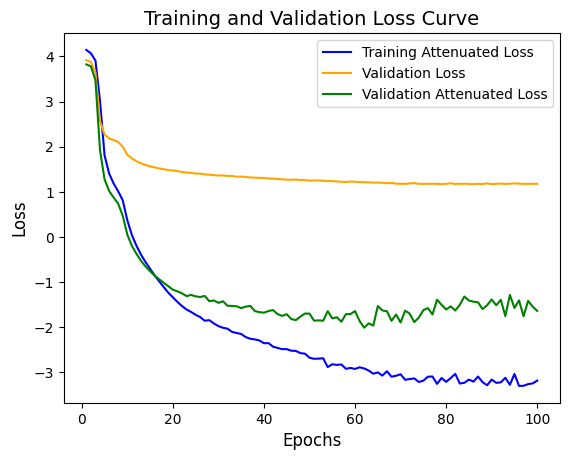

In [8]:
import matplotlib.pyplot as plt

# After training is finished, plot the loss curves
plt.plot(range(1, num_epochs+1), train_attenuated_losses, label='Training Attenuated Loss', color='blue')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', color='orange')
plt.plot(range(1, num_epochs+1), val_attenuated_losses, label='Validation Attenuated Loss', color='green')
# Labeling x and y axes
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
# Adding title
plt.title('Training and Validation Loss Curve', fontsize=14)
# Adding legend
plt.legend()
# Show the plot
plt.show()